In [3]:
import os
import sys
import json
from collections import Counter
import time
import math
import matplotlib.pyplot as plt 
from tweepy import Cursor
import tweepy
from tweepy import OAuthHandler
import datetime
from wordcloud import WordCloud, STOPWORDS


#Variables that contains the user credentials to access Twitter API
access_token = "1196102210565767168-IDj4DDUrNpub4aCbbciaPulpMwIhnn"
access_token_secret = "3dJQJmx2fjNEwicDTdFu1jcSrApsIjxNrSJ9cm5mD1plZ"
consumer_key = "noiJWBxOND49dcBydxTIzGMUt"
consumer_secret = "PsLHztUa54f3NvJjDdxfnQbR9sECRLhM8GTydvIPhqOu0dI8Iq"

# authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [21]:
#extract tweets based on start and end dates(4 weeks data) (watsonsmy)
screen_name = 'watsonsmy'
#creating directory for to save the extracted data
dirname = "Assignment1_data/users/{}".format(screen_name)
try:
    os.makedirs(dirname, mode=0o755, exist_ok=True)
    print("Directory created")
except OSError:
    print("Directory {} already exists".format(dirname))
except Exception as e:
    print("Error while creating directory {}".format(dirname))
    print(e)
    sys.exit(1)
#extracting tweets in a period of 1 month for from watsonmy timeline
startDate = datetime.datetime(2019,12,1)
endDate =   datetime.datetime(2020,1,1)
print("Printing tweets of " + screen_name + ":" )
total_tweet_last_month_watson = 0
#Saving the data into json file
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
with open(fname, 'w') as f:
    for tweet in tweepy.Cursor(api.user_timeline, screen_name='@watsonsmy',tweet_mode="extended").items():
        if(tweet.created_at < endDate and tweet.created_at >= startDate):
            f.write(json.dumps(tweet._json)+"\n")
            total_tweet_last_month_watson = total_tweet_last_month_watson + 1

print("Finished")

print("Total number of Tweets in last month :",total_tweet_last_month_watson)
print("---------------------------------------------------------------------")


Directory created
Printing tweets of watsonsmy:
Finished
Total number of Tweets in last month : 322
---------------------------------------------------------------------


In [22]:
#extract tweets based on start and end dates(4 weeks data) (GuardianMYS)
screen_name = 'GuardianMYS'
dirname = "Assignment1_data/users/{}".format(screen_name)
try:
    os.makedirs(dirname, mode=0o755, exist_ok=True)
    print("Directory created")
except OSError:
    print("Directory {} already exists".format(dirname))
except Exception as e:
    print("Error while creating directory {}".format(dirname))
    print(e)
    sys.exit(1)
#extracting tweets in a period of 1 month for from Guardians timeline
startDate = datetime.datetime(2019,12,1)
endDate =   datetime.datetime(2020,1,1)
print("Printing tweets of " + screen_name + ":" )
total_tweet_last_month_gurdian = 0
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    for tweet in tweepy.Cursor(api.user_timeline, screen_name='@GuardianMYS',tweet_mode="extended").items():
        if(tweet.created_at < endDate and tweet.created_at >= startDate):
            f.write(json.dumps(tweet._json)+"\n")
            total_tweet_last_month_gurdian = total_tweet_last_month_gurdian + 1

print("Finished")

print("Total number of Tweets in last month :",total_tweet_last_month_gurdian)
print("---------------------------------------------------------------------")


Directory created
Printing tweets of GuardianMYS:
Finished
Total number of Tweets in last month : 17
---------------------------------------------------------------------


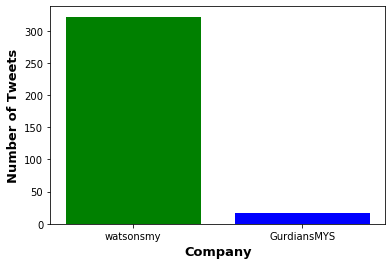

In [14]:
#Plot for total number of tweet in last month

company = ["watsonsmy","GurdiansMYS"]

total_tweet = [total_tweet_last_month_watson,total_tweet_last_month_gurdian]

plt.bar(company, total_tweet,color = ['g', 'b']) 
plt.xlabel('Company',fontsize = 13,fontweight='bold') 

plt.ylabel('Number of Tweets',fontsize = 13,fontweight='bold') 

plt.show() 



In [4]:
# get user's profile(watsonsmy)
screen_name = 'watsonsmy'
print("Collecting user's profile data")
fname = "Assignment1_data/users/{}/user_profile.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    profile = api.get_user(screen_name=screen_name)        
    f.write(json.dumps(profile._json, indent=4))

print("User's profile data collected")

#get total number of followers and friends
with open(fname) as f:
    profile = json.load(f)
    followers_count_watson = profile['followers_count']
    friends_count_watson = profile['friends_count']
    status_count_watson = profile['statuses_count']

print(screen_name +" has",followers_count_watson, "followers")
print(screen_name +" has", friends_count_watson, "friends")


User's profile data collected
watsonsmy has 135710 followers
watsonsmy has 55 friends


In [5]:
# get user's profile(GuardianMYS)
screen_name = 'GuardianMYS'
print("Collecting user's profile data")
fname = "Assignment1_data/users/{}/user_profile.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    profile = api.get_user(screen_name=screen_name)        
    f.write(json.dumps(profile._json, indent=4))

print("User's profile data collected")

#get total number of followers and friends
with open(fname) as f:
    profile = json.load(f)
    followers_count_gurdian = profile['followers_count']
    friends_count_gurdian = profile['friends_count']
    status_count_gurdian = profile['statuses_count']

print(screen_name +" has",followers_count_gurdian, "followers")
print(screen_name +" has", friends_count_gurdian, "friends")


User's profile data collected
GuardianMYS has 33188 followers
GuardianMYS has 299 friends


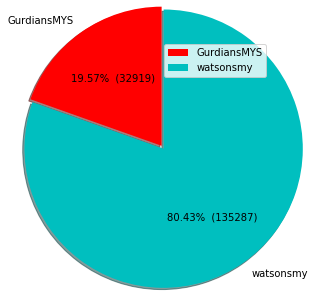

In [15]:
#plot for total number of followers

value_Follower = [followers_count_gurdian,followers_count_watson] 
 
company = ["GurdiansMYS","watsonsmy"] 
  
colors = ['r', 'c'] 
def make_autopct(value_Follower):
    def my_autopct(pct):
        total = sum(value_Follower)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(value_Follower, labels = company, colors=colors,  
        startangle=90, shadow = True, explode = ( 0.02, 0.02), 
        radius = 1.6, autopct = make_autopct(value_Follower)) 
  
plt.legend() 
  
plt.show() 

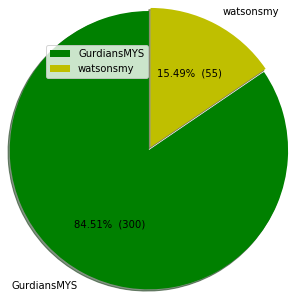

In [7]:
#plot for total number of friends
value_friends = [friends_count_gurdian,friends_count_watson]
company = ["GurdiansMYS","watsonsmy"] 
# color for each label 
colors = ['g', 'y'] 
def make_autopct(value_friends):
    def my_autopct(pct):
        total = sum(value_friends)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(value_friends, labels = company, colors=colors,  
        startangle=90, shadow = True, explode = ( 0.02, 0.02), 
        radius = 1.6, autopct = make_autopct(value_friends)) 
  
plt.legend(loc="best") 
  
plt.show() 

In [64]:
def paginate(items, n):
    for i in range(0, len(items), n):
        yield items[i:i+n]
        
#get follower details(watsonsmy)
screen_name = 'watsonsmy'
print("Collecting followers data")
fname = "Assignment1_data/users/{}/followers.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    for followers in Cursor(api.followers_ids, screen_name=screen_name).pages(30):
        for chunk in paginate(followers, 100):
            users = api.lookup_users(user_ids=chunk)
            for user in users:                    
                f.write(json.dumps(user._json)+"\n") 
        if len(followers) == 5000:
            print("More results available. Sleeping for 10 seconds to avoid rate limit")
            time.sleep(10)
print("watsonsmy's Followers data collected")
print("---------------------------------------------------------------------")

More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds to avoid rate limit
More results available. Sleeping for 10 seconds 

In [5]:
#get follower details(GuardianMYS)
screen_name = 'GuardianMYS'
print("Collecting followers data")
fname = "Assignment1_data/users/{}/followers.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    for followers in Cursor(api.followers_ids, screen_name=screen_name).pages(30):
        for chunk in paginate(followers, 100):
            users = api.lookup_users(user_ids=chunk)
            for user in users:                    
                f.write(json.dumps(user._json)+"\n") 
        if len(followers) == 5000:
            print("More results available. Sleeping for 05 seconds to avoid rate limit")
            time.sleep(5)
print("GuardianMYS's Followers data collected")
print("---------------------------------------------------------------------")

More results available. Sleeping for 05 seconds to avoid rate limit
More results available. Sleeping for 05 seconds to avoid rate limit
More results available. Sleeping for 05 seconds to avoid rate limit
More results available. Sleeping for 05 seconds to avoid rate limit
More results available. Sleeping for 05 seconds to avoid rate limit
More results available. Sleeping for 05 seconds to avoid rate limit
GuardianMYS's Followers data collected
---------------------------------------------------------------------


In [126]:
#get friend details(watsonsmy)
screen_name = 'watsonsmy'
print("collecting friends data")
fname = "Assignment1_data/users/{}/friends.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    for friends in Cursor(api.friends_ids, screen_name=screen_name).pages(30):
        for chunk in paginate(friends, 100):
            users = api.lookup_users(user_ids=chunk)
            for user in users:                   
                f.write(json.dumps(user._json)+"\n")
        if len(friends) == 5000:
            print("More results available. Sleeping for 05 seconds to avoid rate limit")
            time.sleep(5)
print("watsonsmy's Friends data collected")
print("---------------------------------------------------------------------")

collecting friends data
watsonsmy's Friends data collected
---------------------------------------------------------------------


In [127]:
#get friend details(GuardianMYS)
screen_name = 'GuardianMYS'
print("collecting friends data")
fname = "Assignment1_data/users/{}/friends.json".format(screen_name)
#Saving the data into json file
with open(fname, 'w') as f:
    for friends in Cursor(api.friends_ids, screen_name=screen_name).pages(30):
        for chunk in paginate(friends, 100):
            users = api.lookup_users(user_ids=chunk)
            for user in users:                   
                f.write(json.dumps(user._json)+"\n")
        if len(friends) == 5000:
            print("More results available. Sleeping for 05 seconds to avoid rate limit")
            time.sleep(5)
print("GuardianMYS's Friends data collected")
print("---------------------------------------------------------------------")

collecting friends data
GuardianMYS's Friends data collected
---------------------------------------------------------------------


In [23]:
#calculating favorite,retweet and avg retweet(watsonsmy)
screen_name = 'watsonsmy'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
#extracting information from json file
with open(fname) as f1:
    favorite_count_watson, retweet_count_watson = 0,0
    for line in f1:
        tweet = json.loads(line)
        favorite_count_watson = favorite_count_watson + tweet['favorite_count']
        retweet_count_watson = retweet_count_watson + tweet['retweet_count']
print("favortite count :" ,favorite_count_watson)  
avg_retweet_per_tweet_watson = retweet_count_watson / total_tweet_last_month_watson
print("Retweet count :" ,retweet_count_watson)
print("Avg retweet of per tweet " + "{:.2f}".format(avg_retweet_per_tweet_watson))


favortite count : 15966
Retweet count : 5917
Avg retweet of per tweet 18.38


In [24]:
#calculating favorite,retweet and avg retweet(GuardianMYS)
screen_name = 'GuardianMYS'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
#extracting information from json file
with open(fname) as f1:
    favorite_count_gurdian, retweet_count_gurdian = 0,0
    for line in f1:
        tweet = json.loads(line)
        favorite_count_gurdian = favorite_count_gurdian + tweet['favorite_count']
        retweet_count_gurdian = retweet_count_gurdian + tweet['retweet_count']
print("favortite count :" ,favorite_count_gurdian)  
avg_retweet_per_tweet_gurdian = retweet_count_gurdian / total_tweet_last_month_gurdian
print("Retweet count :" ,retweet_count_gurdian)
print("Avg retweet of per tweet " + "{:.2f}".format(avg_retweet_per_tweet_gurdian))

favortite count : 2625
Retweet count : 2109
Avg retweet of per tweet 124.06


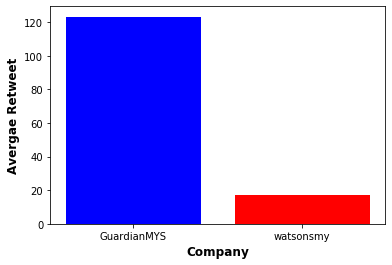

In [215]:
#plot for avg retweet of per tweet tweet

x = [avg_retweet_per_tweet_gurdian,avg_retweet_per_tweet_watson]
y = ['GuardianMYS','watsonsmy']

plt.bar(y,x,color = ['blue','red'])
plt.xlabel('Company',fontsize = 12,fontweight='bold') 

plt.ylabel('Avergae Retweet',fontsize = 12,fontweight='bold') 
  
plt.show()

In [14]:
#get total number of hashtag(watsonsmy)
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

screen_name = 'watsonsmy'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
total_hashtag_watson = 0
#extracting information from json file
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.items():
        total_hashtag_watson = total_hashtag_watson + count
    

print("Total hashtag for watsonsMY:",total_hashtag_watson)


Total hashtag for watsonsMY: 399


In [15]:
#get total number of hashtag(GuardianMYS)
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]
screen_name = 'GuardianMYS'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
total_hashtag_gurdian = 0
#extracting information from json file
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.items():
        total_hashtag_gurdian = total_hashtag_gurdian + count
    

print("Total hashtag for gurdianMYS:",total_hashtag_gurdian)


Total hashtag for gurdianMYS: 59


In [16]:
#get total number of mentions(watsonsmy)
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

screen_name = 'watsonsmy'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
total_mention_watson = 0
#extracting information from json file
with open(fname, 'r') as f:
    users = Counter()
    for line in f:
        tweet = json.loads(line)
        mentions_in_tweet = get_mentions(tweet)
        users.update(mentions_in_tweet)
    for user, count in users.items():
        total_mention_watson = total_mention_watson + count

print("Total mentionsfor watsonsMY:",total_mention_watson)
        

Total mentionsfor watsonsMY: 180


In [17]:
#get total number of mentions(GuardianMYS)
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

screen_name = 'GuardianMYS'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
total_mention_gurdian = 0
#extracting information from json file
with open(fname, 'r') as f:
    users = Counter()
    for line in f:
        tweet = json.loads(line)
        mentions_in_tweet = get_mentions(tweet)
        users.update(mentions_in_tweet)
        
    for user, count in users.items():
        total_mention_gurdian = total_mention_gurdian + count

print("Total mentions for gurdianMYS:",total_mention_gurdian)
        

Total mentions for gurdianMYS: 4


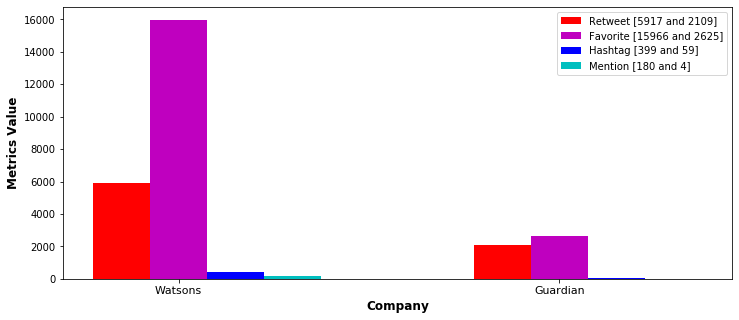

In [35]:
# plot for 4 metrics total number of(retweet,hashtag,favorite and mention)
import numpy
company = ['Watsons','Guardian']
bar_width = 0.15
mention = [total_mention_watson,total_mention_gurdian]
hashtag = [total_hashtag_watson,total_hashtag_gurdian]
favorite= [favorite_count_watson,favorite_count_gurdian]
retweet = [retweet_count_watson,retweet_count_gurdian]
x = numpy.arange(len(mention))
plt.figure(figsize=(12,5))
plt.bar(x,retweet,color = 'r',width = bar_width ,label = 'Retweet [5917 and 2109]')
plt.bar(x + bar_width,favorite,color = 'm',width = bar_width,label = 'Favorite [15966 and 2625]')
plt.bar(x + bar_width*2,hashtag,color = 'b',width = bar_width,label = 'Hashtag [399 and 59]')
plt.bar(x + bar_width*3,mention,color = 'c',width = bar_width,label = 'Mention [180 and 4]')
plt.xticks(x+ bar_width,company,fontsize= 11)
plt.xlabel('Company',fontsize = 12,fontweight = 'bold')
plt.ylabel('Metrics Value',fontsize = 12,fontweight = 'bold')
plt.legend()
plt.show()


In [12]:
#calculating total engagement(watsonsmy)
total_engagement_watson = total_mention_watson + total_hashtag_watson + favorite_count_watson + retweet_count_watson
print("Total Engagement of watsonsMY", total_engagement_watson)

Total Engagement of watsonsMY 21627


In [13]:
#calculating total engagement(GuardianMYS)
total_engagement_gurdian = total_mention_gurdian + total_hashtag_gurdian + favorite_count_gurdian + retweet_count_gurdian
print("Total Engagement of gurdianMYS", total_engagement_gurdian)

Total Engagement of gurdianMYS 4771


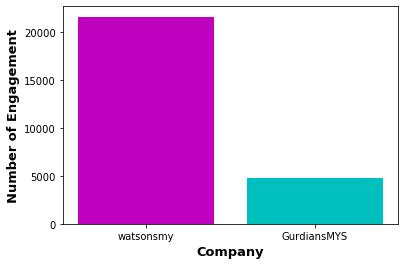

In [218]:
#plot for total number of engagement
company = ["watsonsmy","GurdiansMYS"]

total_engagement = [total_engagement_watson,total_engagement_gurdian]

plt.bar(company, total_engagement,color = ['m', 'c']) 
plt.xlabel('Company',fontsize = 13,fontweight='bold') 

plt.ylabel('Number of Engagement',fontsize = 13,fontweight='bold') 

plt.show() 


In [4]:
#get total retweet in each date(watsonsmy)
screen_name = 'watsonsmy'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
print("   Date    "+"  Total retweet")
date =[]
retweet=[]
#extracting information from json file
for number in range(1,32):
    with open(fname) as f:
        total_retweet_watson = 0
        x = '2019-12-0{}'.format(number)
        if(number > 9):
            x = '2019-12-{}'.format(number)
        for line in f:
            tweet = json.loads(line)
            ts = time.strftime('%Y-%m-%d',time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
            if(ts == x):
                total_retweet_watson = total_retweet_watson + tweet['retweet_count']
                
        retweet.append(total_retweet_watson)
        print(x +"     ",total_retweet_watson)
    date.append(number)    
print(date)
print(retweet)


   Date      Total retweet
2019-12-01      1
2019-12-02      19
2019-12-03      17
2019-12-04      47
2019-12-05      165
2019-12-06      272
2019-12-07      58
2019-12-08      4
2019-12-09      24
2019-12-10      88
2019-12-11      1315
2019-12-12      76
2019-12-13      56
2019-12-14      26
2019-12-15      18
2019-12-16      379
2019-12-17      119
2019-12-18      18
2019-12-19      147
2019-12-20      134
2019-12-21      75
2019-12-22      14
2019-12-23      11
2019-12-24      77
2019-12-25      31
2019-12-26      102
2019-12-27      54
2019-12-28      17
2019-12-29      2
2019-12-30      935
2019-12-31      1502
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 19, 17, 47, 165, 272, 58, 4, 24, 88, 1315, 76, 56, 26, 18, 379, 119, 18, 147, 134, 75, 14, 11, 77, 31, 102, 54, 17, 2, 935, 1502]


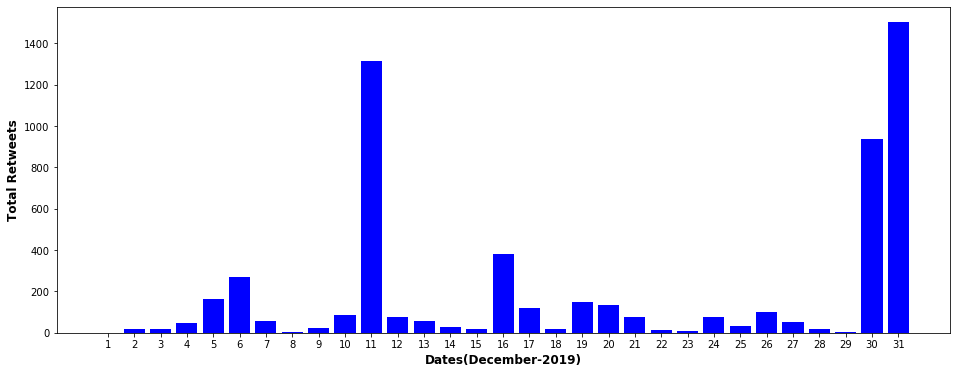

In [8]:
#plot to visualize the total retweets each day(watsonsmy)
plt.figure(figsize=(16,6))
day = ['1','2','3','4','5','6',"7",'8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
plt.bar(day,retweet,color = 'blue')
plt.xlabel('Dates(December-2019)',fontweight='bold',fontsize = 12) 
plt.ylabel('Total Retweets',fontweight='bold',fontsize = 12) 
  
plt.show()

In [6]:
#get total retweet in each date(GuardianMYS)
screen_name = 'GuardianMYS'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
print("   Date    "+"  Total retweet")
retweets =[]
dates=[]
#extracting information from json file
for number in range(1,32):
    with open(fname) as f:
        total_retweet_gurdian = 0
        x = '2019-12-0{}'.format(number)
        if(number > 9):
            x = '2019-12-{}'.format(number)
        for line in f:
            tweet = json.loads(line)
            ts = time.strftime('%Y-%m-%d',time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
            if(ts == x):
                total_retweet_gurdian = total_retweet_gurdian + tweet['retweet_count']
        
        print(x +"     ",total_retweet_gurdian)
        retweets.append(total_retweet_gurdian)
    dates.append(number)
    
print(retweets)

   Date      Total retweet
2019-12-01      0
2019-12-02      0
2019-12-03      0
2019-12-04      0
2019-12-05      182
2019-12-06      0
2019-12-07      0
2019-12-08      0
2019-12-09      0
2019-12-10      0
2019-12-11      0
2019-12-12      88
2019-12-13      0
2019-12-14      0
2019-12-15      0
2019-12-16      473
2019-12-17      0
2019-12-18      0
2019-12-19      0
2019-12-20      0
2019-12-21      0
2019-12-22      0
2019-12-23      0
2019-12-24      0
2019-12-25      0
2019-12-26      9
2019-12-27      0
2019-12-28      0
2019-12-29      0
2019-12-30      91
2019-12-31      1266
[0, 0, 0, 0, 182, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 473, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 91, 1266]


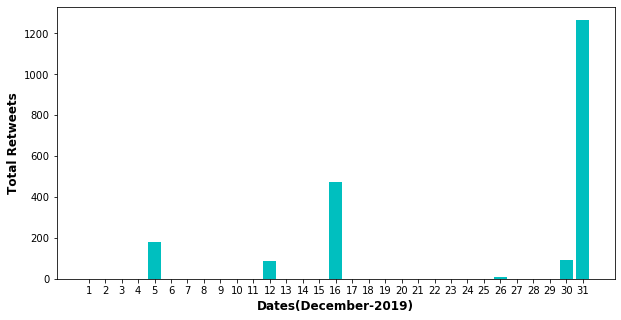

In [7]:
#plot to visualize the total retweets each day(Guardians)
plt.figure(figsize=(10,5))
#day = ['1st','2nd','3rd','4th','5th','6th',"7th",'8th','9th','10th','11th','12th','13th','14th','15th','16th','17th','18th','19th','20th','21st','22nd','23rd','24th','25th','26th','27th','28th','29th','30th','31st']
day = ['1','2','3','4','5','6',"7",'8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
plt.bar(day,retweets,color = 'c')

plt.xlabel('Dates(December-2019)',fontweight='bold',fontsize = 12) 

plt.ylabel('Total Retweets',fontweight='bold',fontsize = 12) 
  
plt.show()

In [17]:
#get popular tweet(watsonsmy)
screen_name = 'watsonsmy'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
highest_watson = 0
popular_tweet_watson = " "
#extracting information from json file
with open(fname) as f:
    for line in f:
        tweet = json.loads(line)
        if(tweet['retweet_count'] > highest_watson):
            highest_watson = tweet['retweet_count']
            popular_tweet_watson = str(tweet['full_text'])
            
            
    print(" Tweet: " + popular_tweet_watson,"Total Retweet: ",highest_watson)
        


 Tweet: Losyen Pisang: RM18.90 sahaja. Dengan ekstrak pisang sebenar. 🍌 Hanya di #WatsonsMalaysia. 😉 https://t.co/NNdFn77qJs Total Retweet:  1258


In [19]:
#get popular tweet(GuardianMYS)
screen_name = 'GuardianMYS'
fname = "Assignment1_data/user_timeline_{}.json".format(screen_name)
highest_gurdian = 0
popular_tweet_gurdian = " "
#extracting information from json file
with open(fname) as f:
    for line in f:
        tweet = json.loads(line)
        if(tweet['retweet_count'] > highest_gurdian):
            highest_gurdian = tweet['retweet_count']
            popular_tweet_gurdian = str(tweet['full_text'])
            
            
    print("Tweet: " + popular_tweet_gurdian,"Total Retweet: ",highest_gurdian)
        


Tweet: [ALL COSMETIC BRANDS 50% OFF!]* 💄
Time to stock up ladies and get 50% OFF from 1st until 5th January! 😍 🧡
Shop at the nearest Guardian stores OR Guardian Online at: https://t.co/c4BZsmYUXF
 
#GuardianMY #BeautyDays #HaulwithGuardian #Cosmetics #Makeup #Sale #Promotion https://t.co/QnTUZcvnOs Total Retweet:  1125


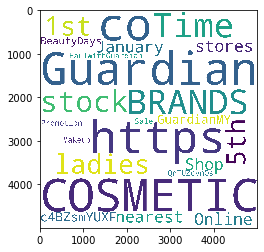

In [214]:
#Word cloud for most poplular tweet(GuardianMYS)
wordcloud = WordCloud(background_color='white', width=5000, height=5000).generate(popular_tweet_gurdian)

plt.imshow(wordcloud)
plt.axis("on")
plt.show()

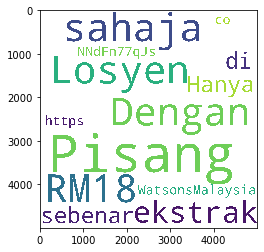

In [219]:
#plot for most poplular tweet(watsonsmy)
wordcloud = WordCloud(background_color='white', width=5000, height=5000).generate(popular_tweet_watson)
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

In [36]:
#get total number of  follower by states(guardian)
states_M = ['kuala lumpur','johor','selangor','penang','perak','sarawak','kedah','pahang','kelantan','terengganu','malacca','negeri sembilan','perlis','sabah','putrajaya','kl','melaka']

screen_name = "GuardianMYS"
followers_file = 'Assignment1_data//users/{}/followers.json'.format(screen_name)
print(screen_name,"\n")

#extracting information from json file
with open(followers_file) as f1:
    followers = []
    for line in f1:
        profile = json.loads(line)
        followers.append(profile['location'].lower())
        
for state in states_M:
    number = 0
    for follower in followers:
        if state in follower:
            number = number + 1
    print(state,number)
#from the output, combines kl + kuala lumpur and also similar for malacca and melaka
States_gurdian= ['KL','Johor','Selangor','Penang','Perak','Sarawak','Kedah','Pahang','Kelantan','Terengganu','Malacca','NS','Perlis','Sabah','Putrajaya']
total_gurdian = [1352,1207,1487,240,590,373,684,461,436,409,354,169,102,560,94]

GuardianMYS 

kuala lumpur 1135
johor 1207
selangor 1487
penang 240
perak 590
sarawak 373
kedah 684
pahang 461
kelantan 436
terengganu 409
malacca 200
negeri sembilan 169
perlis 102
sabah 560
putrajaya 94
kl 217
melaka 154


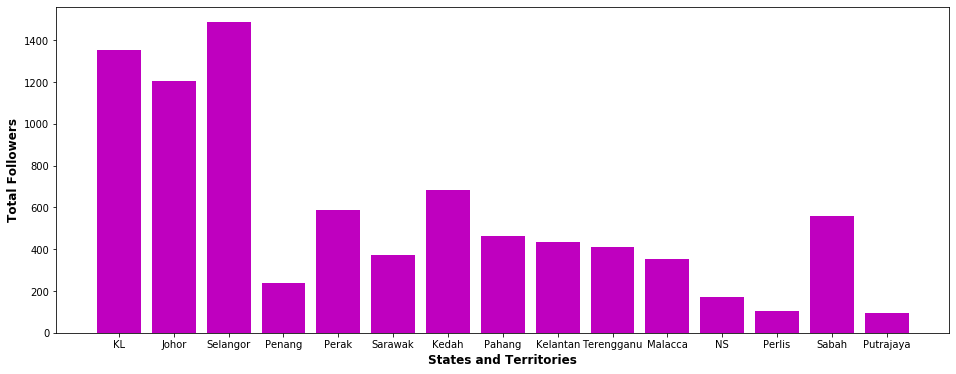

In [37]:
#plot for follower by states(guardian)
plt.figure(figsize=(16,6))
plt.bar(States_gurdian,total_gurdian,color = 'm')
plt.xlabel('States and Territories',fontweight='bold',fontsize = 12) 
plt.ylabel('Total Followers',fontweight='bold',fontsize = 12) 
  
plt.show()

In [38]:
#get total number of  follower by states(watsons)
states_M = ['kuala lumpur','johor','selangor','penang','perak','sarawak','kedah','pahang','kelantan','terengganu','malacca','negeri sembilan','perlis','sabah','putrajaya','kl','melaka']
screen_name = "watsonsmy"
followers_file2 = 'Assignment1_data//users/{}/followers.json'.format(screen_name)
print(screen_name,"\n")

#extracting information from json file
with open(followers_file2) as f2:
    followers = []
    for line in f2:
        profile = json.loads(line)
        followers.append(profile['location'].lower())
        
for state in states_M:
    number = 0
    for follower in followers:
        if state in follower:
            number = number + 1
    print(state,number)
#from the output, combines kl + kuala lumpur and also similar for malacca and melaka
States_watson= ['KL','Johor','Selangor','Penang','Perak','Sarawak','Kedah','Pahang','Kelantan','Terengganu','Malacca','NS','Perlis','Sabah','Putrajaya']
total_watson = [5411,5518,6228,803,2584,2436,2949,2136,2157,1517,1706,839,382,3210,396]

watsonsmy 

kuala lumpur 4625
johor 5518
selangor 6228
penang 803
perak 2584
sarawak 2436
kedah 2949
pahang 2136
kelantan 2157
terengganu 1517
malacca 1002
negeri sembilan 839
perlis 382
sabah 3210
putrajaya 396
kl 786
melaka 704


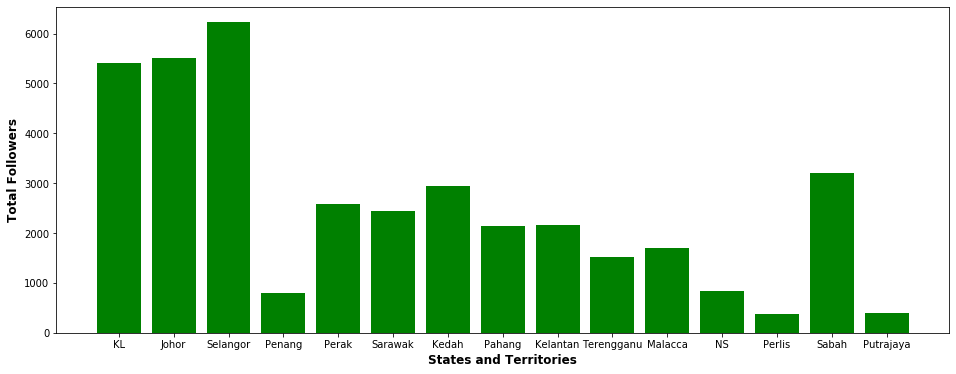

In [46]:
#plot for follower by states(watsons)
plt.figure(figsize=(16,6))
plt.bar(States_watson,total_watson,color = 'g')
plt.xlabel('States and Territories',fontweight='bold',fontsize = 12) 
plt.ylabel('Total Followers',fontweight='bold',fontsize = 12) 
plt.show()